In [1]:
import json
import requests
from keras.models import Sequential
from keras.layers import Activation, Dense, Dropout, LSTM
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns
from sklearn.metrics import mean_absolute_error

In [2]:
hist=pd.read_csv("bitcoins.csv")

In [3]:
hist

,Date,Price,Open,High,Low,Vol.,Change %
0,18-Jul-10,0.1,0,0.1,0.1,0.08K,0.00%
1,19-Jul-10,0.1,0.1,0.1,0.1,0.57K,0.00%
2,20-Jul-10,0.1,0.1,0.1,0.1,0.26K,0.00%
3,21-Jul-10,0.1,0.1,0.1,0.1,0.58K,0.00%
4,22-Jul-10,0.1,0.1,0.1,0.1,2.16K,0.00%
...,...,...,...,...,...,...,...
4122,30-Oct-21,61840.1,"62,245.00","62,338.50","60,786.00",40.51K,-0.65%
4123,31-Oct-21,61309.6,"61,842.20","62,393.70","60,005.70",50.06K,-0.86%
4124,1-Nov-21,60915.3,"61,310.10","62,430.10","59,612.70",61.21K,-0.64%
4125,2-Nov-21,63221.7,"60,912.20","64,256.40","60,651.50",65.26K,3.79%


In [4]:
df1=hist.reset_index()['Price']

In [5]:
df1

0           0.1
1           0.1
2           0.1
3           0.1
4           0.1
         ...   
4122    61840.1
4123    61309.6
4124    60915.3
4125    63221.7
4126    62896.7
Name: Price, Length: 4127, dtype: float64

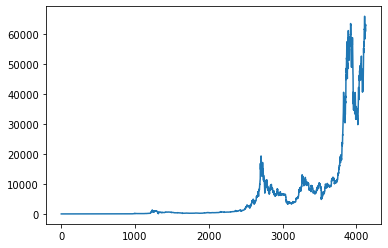

In [6]:
import matplotlib.pyplot as plt
plt.plot(df1)

In [7]:
import numpy as np

In [14]:
from sklearn.preprocessing import MinMaxScaler
scaler=MinMaxScaler(feature_range=(0,1))
df1=scaler.fit_transform(np.array(df1).reshape(-1,1))

In [15]:

print(df1)

[[0.        ]
 [0.        ]
 [0.        ]
 ...
 [0.92325134]
 [0.95820791]
 [0.9532821 ]]


In [16]:
##splitting dataset into train and test split
training_size=int(len(df1)*0.65)
test_size=len(df1)-training_size
train_data,test_data=df1[0:training_size,:],df1[training_size:len(df1),:1]

In [17]:
training_size,test_size

(2682, 1445)

In [18]:
train_data

array([[0.        ],
       [0.        ],
       [0.        ],
       ...,
       [0.11670228],
       [0.11792843],
       [0.12189485]])

In [19]:
import numpy
# convert an array of values into a dataset matrix
def create_dataset(dataset, time_step=1):
	dataX, dataY = [], []
	for i in range(len(dataset)-time_step-1):
		a = dataset[i:(i+time_step), 0]   ###i=0, 0,1,2,3-----99   100 
		dataX.append(a)
		dataY.append(dataset[i + time_step, 0])
	return numpy.array(dataX), numpy.array(dataY)

In [20]:

# reshape into X=t,t+1,t+2,t+3 and Y=t+4
time_step = 100
X_train, y_train = create_dataset(train_data, time_step)
X_test, ytest = create_dataset(test_data, time_step)

In [21]:
print(X_train.shape), print(y_train.shape)

(2581, 100)
(2581,)


(None, None)

In [22]:
print(X_test.shape), print(ytest.shape)

(1344, 100)
(1344,)


(None, None)

In [23]:
# reshape input to be [samples, time steps, features] which is required for LSTM
X_train =X_train.reshape(X_train.shape[0],X_train.shape[1] , 1)
X_test = X_test.reshape(X_test.shape[0],X_test.shape[1] , 1)

In [24]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.layers import LSTM

In [25]:
model=Sequential()
model.add(LSTM(50,return_sequences=True,input_shape=(100,1)))
model.add(LSTM(50,return_sequences=True))
model.add(LSTM(50))
model.add(Dense(1))
model.compile(loss='mean_squared_error',optimizer='adam')

In [26]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
lstm (LSTM)                  (None, 100, 50)           10400     
_________________________________________________________________
lstm_1 (LSTM)                (None, 100, 50)           20200     
_________________________________________________________________
lstm_2 (LSTM)                (None, 50)                20200     
_________________________________________________________________
dense (Dense)                (None, 1)                 51        
Total params: 50,851
Trainable params: 50,851
Non-trainable params: 0
_________________________________________________________________


In [27]:
model.fit(X_train,y_train,validation_data=(X_test,ytest),epochs=100,batch_size=64,verbose=1)

Epoch 1/100
41/41 [==============================] - 7s 163ms/step - loss: 7.3308e-05 - val_loss: 0.0027
Epoch 2/100
41/41 [==============================] - 5s 116ms/step - loss: 8.3692e-06 - val_loss: 0.0032
Epoch 3/100
41/41 [==============================] - 5s 118ms/step - loss: 6.6081e-06 - val_loss: 0.0020
Epoch 4/100
41/41 [==============================] - 6s 136ms/step - loss: 6.7208e-06 - val_loss: 0.0019
Epoch 5/100
41/41 [==============================] - 6s 139ms/step - loss: 5.4992e-06 - val_loss: 0.0016
Epoch 6/100
41/41 [==============================] - 5s 117ms/step - loss: 5.8442e-06 - val_loss: 0.0018
Epoch 7/100
41/41 [==============================] - 6s 147ms/step - loss: 6.0537e-06 - val_loss: 0.0047
Epoch 8/100
41/41 [==============================] - 5s 126ms/step - loss: 6.5906e-06 - val_loss: 0.0023
Epoch 9/100
41/41 [==============================] - 6s 156ms/step - loss: 4.9713e-06 - val_loss: 0.0026
Epoch 10/100
41/41 [==============================] - 6

41/41 [==============================] - 5s 122ms/step - loss: 2.2163e-06 - val_loss: 7.1897e-04
Epoch 78/100
41/41 [==============================] - 5s 118ms/step - loss: 1.9748e-06 - val_loss: 7.9159e-04
Epoch 79/100
41/41 [==============================] - 5s 129ms/step - loss: 1.7288e-06 - val_loss: 9.0781e-04
Epoch 80/100
41/41 [==============================] - 5s 123ms/step - loss: 1.8497e-06 - val_loss: 0.0016
Epoch 81/100
41/41 [==============================] - 5s 130ms/step - loss: 2.0109e-06 - val_loss: 7.1396e-04
Epoch 82/100
41/41 [==============================] - 5s 131ms/step - loss: 1.7144e-06 - val_loss: 7.5363e-04
Epoch 83/100
41/41 [==============================] - 5s 118ms/step - loss: 1.6297e-06 - val_loss: 3.9048e-04
Epoch 84/100
41/41 [==============================] - 5s 126ms/step - loss: 2.1526e-06 - val_loss: 8.9821e-04
Epoch 85/100
41/41 [==============================] - 5s 129ms/step - loss: 1.6242e-06 - val_loss: 9.9542e-04
Epoch 86/100
41/41 [=======

In [28]:

### Lets Do the prediction and check performance metrics
train_predict=model.predict(X_train)
test_predict=model.predict(X_test)

In [29]:
##Transformback to original form
train_predict=scaler.inverse_transform(train_predict)
test_predict=scaler.inverse_transform(test_predict)

In [30]:
### Calculate RMSE performance metrics
import math
from sklearn.metrics import mean_squared_error
math.sqrt(mean_squared_error(y_train,train_predict))

1216.5398039469692

In [31]:
math.sqrt(mean_squared_error(ytest,test_predict))

25095.60542605121

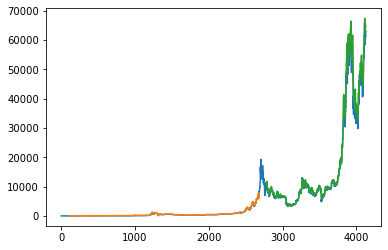

In [32]:
### Plotting 
# shift train predictions for plotting
look_back=100
trainPredictPlot = numpy.empty_like(df1)
trainPredictPlot[:, :] = np.nan
trainPredictPlot[look_back:len(train_predict)+look_back, :] = train_predict
# shift test predictions for plotting
testPredictPlot = numpy.empty_like(df1)
testPredictPlot[:, :] = numpy.nan
testPredictPlot[len(train_predict)+(look_back*2)+1:len(df1)-1, :] = test_predict
# plot baseline and predictions
plt.plot(scaler.inverse_transform(df1))
plt.plot(trainPredictPlot)
plt.plot(testPredictPlot)
plt.show()

In [33]:

len(test_data)

1445

In [34]:
x_input=test_data[1345:].reshape(1,-1)
x_input.shape

(1, 100)

In [35]:
temp_input=list(x_input)
temp_input=temp_input[0].tolist()

In [36]:
temp_input

[0.5979463162521408,
 0.6063004895497052,
 0.6062732081419846,
 0.6396474635868988,
 0.6298003910335106,
 0.6044074629806454,
 0.5936479789023781,
 0.577914184816381,
 0.602264356840813,
 0.6193955652556116,
 0.6486200154594643,
 0.6761863623274071,
 0.6637369466042226,
 0.7014989617908729,
 0.6910335106624835,
 0.6905863987026175,
 0.672991406356568,
 0.7246093453977781,
 0.7135815941435911,
 0.7122144924900348,
 0.6971339365555708,
 0.6773594628593946,
 0.6778474969308417,
 0.7086466906136801,
 0.7475696812622198,
 0.7407766107397808,
 0.7465163157974507,
 0.7508389032874095,
 0.7231785871262068,
 0.7425756680155807,
 0.7097940253717091,
 0.7436335803816366,
 0.7410994407311416,
 0.7392852271177193,
 0.7122357113627062,
 0.7143227390533352,
 0.7399217932978676,
 0.7468164112823777,
 0.7578002091574592,
 0.7565786083450795,
 0.7846208642143712,
 0.7983146152563694,
 0.7090058958153351,
 0.6981206141348005,
 0.7030342987920398,
 0.6796511011079284,
 0.6844874884432925,
 0.6981342548386

In [37]:
from numpy import array

lst_output=[]
n_steps=100
i=0
while(i<30):
    
    if(len(temp_input)>100):
        #print(temp_input)
        x_input=np.array(temp_input[1:])
        print("{} day input {}".format(i,x_input))
        x_input=x_input.reshape(1,-1)
        x_input = x_input.reshape((1, n_steps, 1))
        #print(x_input)
        yhat = model.predict(x_input, verbose=0)
        print("{} day output {}".format(i,yhat))
        temp_input.extend(yhat[0].tolist())
        temp_input=temp_input[1:]
        #print(temp_input)
        lst_output.extend(yhat.tolist())
        i=i+1
    else:
        x_input = x_input.reshape((1, n_steps,1))
        yhat = model.predict(x_input, verbose=0)
        print(yhat[0])
        temp_input.extend(yhat[0].tolist())
        print(len(temp_input))
        lst_output.extend(yhat.tolist())
        i=i+1
    

print(lst_output)

[0.99989086]
101
1 day input [0.60630049 0.60627321 0.63964746 0.62980039 0.60440746 0.59364798
 0.57791418 0.60226436 0.61939557 0.64862002 0.67618636 0.66373695
 0.70149896 0.69103351 0.6905864  0.67299141 0.72460935 0.71358159
 0.71221449 0.69713394 0.67735946 0.6778475  0.70864669 0.74756968
 0.74077661 0.74651632 0.7508389  0.72317859 0.74257567 0.70979403
 0.74363358 0.74109944 0.73928523 0.71223571 0.71432274 0.73992179
 0.74681641 0.75780021 0.75657861 0.78462086 0.79831462 0.7090059
 0.69812061 0.7030343  0.6796511  0.68448749 0.69813425 0.68126828
 0.71352097 0.72948211 0.72368329 0.71663256 0.73215114 0.71596417
 0.64975977 0.61612331 0.66008124 0.68005123 0.64899135 0.64697404
 0.6548038  0.63918065 0.62174631 0.62954425 0.66419921 0.72971552
 0.72245411 0.73053547 0.74610406 0.78008457 0.83849558 0.81516543
 0.81714788 0.83272556 0.82886373 0.87114385 0.84899438 0.86967065
 0.86915079 0.93472772 0.92242986 0.93253005 0.94054472 0.97422513
 1.         0.94287728 0.91984116 

 1.14758694 1.16773164 1.18629193 1.20353198]
10 day output [[1.2197287]]
11 day input [0.67618636 0.66373695 0.70149896 0.69103351 0.6905864  0.67299141
 0.72460935 0.71358159 0.71221449 0.69713394 0.67735946 0.6778475
 0.70864669 0.74756968 0.74077661 0.74651632 0.7508389  0.72317859
 0.74257567 0.70979403 0.74363358 0.74109944 0.73928523 0.71223571
 0.71432274 0.73992179 0.74681641 0.75780021 0.75657861 0.78462086
 0.79831462 0.7090059  0.69812061 0.7030343  0.6796511  0.68448749
 0.69813425 0.68126828 0.71352097 0.72948211 0.72368329 0.71663256
 0.73215114 0.71596417 0.64975977 0.61612331 0.66008124 0.68005123
 0.64899135 0.64697404 0.6548038  0.63918065 0.62174631 0.62954425
 0.66419921 0.72971552 0.72245411 0.73053547 0.74610406 0.78008457
 0.83849558 0.81516543 0.81714788 0.83272556 0.82886373 0.87114385
 0.84899438 0.86967065 0.86915079 0.93472772 0.92242986 0.93253005
 0.94054472 0.97422513 1.         0.94287728 0.91984116 0.92927143
 0.92251171 0.95586323 0.91408933 0.8857060

18 day output [[1.3306575]]
19 day input [0.71221449 0.69713394 0.67735946 0.6778475  0.70864669 0.74756968
 0.74077661 0.74651632 0.7508389  0.72317859 0.74257567 0.70979403
 0.74363358 0.74109944 0.73928523 0.71223571 0.71432274 0.73992179
 0.74681641 0.75780021 0.75657861 0.78462086 0.79831462 0.7090059
 0.69812061 0.7030343  0.6796511  0.68448749 0.69813425 0.68126828
 0.71352097 0.72948211 0.72368329 0.71663256 0.73215114 0.71596417
 0.64975977 0.61612331 0.66008124 0.68005123 0.64899135 0.64697404
 0.6548038  0.63918065 0.62174631 0.62954425 0.66419921 0.72971552
 0.72245411 0.73053547 0.74610406 0.78008457 0.83849558 0.81516543
 0.81714788 0.83272556 0.82886373 0.87114385 0.84899438 0.86967065
 0.86915079 0.93472772 0.92242986 0.93253005 0.94054472 0.97422513
 1.         0.94287728 0.91984116 0.92927143 0.92251171 0.95586323
 0.91408933 0.88570606 0.91820731 0.94337138 0.93726792 0.92922748
 0.92325134 0.95820791 0.9532821  0.99989086 1.02267933 1.0495168
 1.07633781 1.10186636 

28 day output [[1.422919]]
29 day input [0.74257567 0.70979403 0.74363358 0.74109944 0.73928523 0.71223571
 0.71432274 0.73992179 0.74681641 0.75780021 0.75657861 0.78462086
 0.79831462 0.7090059  0.69812061 0.7030343  0.6796511  0.68448749
 0.69813425 0.68126828 0.71352097 0.72948211 0.72368329 0.71663256
 0.73215114 0.71596417 0.64975977 0.61612331 0.66008124 0.68005123
 0.64899135 0.64697404 0.6548038  0.63918065 0.62174631 0.62954425
 0.66419921 0.72971552 0.72245411 0.73053547 0.74610406 0.78008457
 0.83849558 0.81516543 0.81714788 0.83272556 0.82886373 0.87114385
 0.84899438 0.86967065 0.86915079 0.93472772 0.92242986 0.93253005
 0.94054472 0.97422513 1.         0.94287728 0.91984116 0.92927143
 0.92251171 0.95586323 0.91408933 0.88570606 0.91820731 0.94337138
 0.93726792 0.92922748 0.92325134 0.95820791 0.9532821  0.99989086
 1.02267933 1.0495168  1.07633781 1.10186636 1.12565672 1.14758694
 1.16773164 1.18629193 1.20353198 1.21972871 1.23513281 1.24994636
 1.26431179 1.27831006